In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from matplotlib import cm
cmap = matplotlib.colormaps.get_cmap('viridis_r')

# Ignore warning
import warnings
import logging

logging.getLogger('matplotlib').setLevel(logging.ERROR)
warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)

# Get plot params

from plot_params import params
pylab.rcParams.update(params)

# Set default colors to load at will
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline

In [2]:
import wandb

In [3]:
! wandb login

wandb: Currently logged in as: smsharma. Use `wandb login --relogin` to force relogin


In [4]:
# # Assuming 'run_labels' contains the names of the runs you are interested in
# # Define it based on your requirements
# run_labels = ['pretty-aardvark-45',
#              'devout-hill-47',
#               'vibrant-feather-50',
#               'spring-snowball-56',
#               'fresh-jazz-58']

# run_legends = ['Fine tune full', 
#               "No summarization",
#               'Fine tune head',
#                'Train from scratch',
#                'Shuffle within batch']

# # Creating the dictionary
# run_dict = {run_labels[i]: run_legends[i] for i in range(len(run_labels))}

# api = wandb.Api()
# runs = api.runs("smsharma/multimodal-hubble")

# # Initialize dictionaries to hold the data for plotting
# top5_data = {}
# top10_data = {}

# for run in runs:
#     if run.name in run_labels:
        
#         # Fetch history for top 5 and top 10 accuracy
#         history_top5 = run.history(keys=["val/top_5_accuracy"])
#         history_top10 = run.history(keys=["val/top_10_accuracy"])  # assuming this key exists

#         # Store the data for later plotting
#         top5_data[run.name] = (history_top5['_step'], history_top5['val/top_5_accuracy'])
#         top10_data[run.name] = (history_top10['_step'], history_top10['val/top_10_accuracy'])  # replace with correct key if different

# # Plotting
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# # Plot for Top 5 Accuracy
# for idx, (run_name, (steps, accuracy)) in enumerate(top5_data.items()):
#     ls = '-' if run_dict[run_name] == "Shuffle within batch" else '-'
#     axes[0].plot(list(200 * np.arange(1, len(steps) + 1)), list(accuracy), label=run_dict[run_name], lw=2, ls=ls)  # replace with correct key if different

# axes[0].set_title(r"\textbf{Top-5}\%")
# axes[0].set_xlabel("Training steps")
# axes[0].set_ylabel("Retrival accuracy")
# axes[0].axhline(0.05, color='grey', ls='--', lw=1.5)
# axes[0].set_ylim(0, 0.35)
# axes[0].set_xlim(-500, 20_000)

# # Plot for Top 10 Accuracy
# for run_name, (steps, accuracy) in top10_data.items():
#     ls = '-' if run_dict[run_name] == "Shuffle within batch" else '-'
#     axes[1].plot(list(200 * np.arange(1, len(steps) + 1)), list(accuracy), label=run_dict[run_name], lw=2, ls=ls)  # replace with correct key if different

# axes[1].set_title(r"\textbf{Top-10}\%")
# axes[1].set_xlabel("Training steps")
# axes[1].set_ylabel("Retrival accuracy")
# axes[1].axhline(0.1, color='grey', ls='--', lw=1.5)
# axes[1].set_ylim(0, 0.6)
# axes[1].set_xlim(-500, 20_000)
# axes[1].text(10_000, 0.12, "\emph{Random expectation}", fontsize=15)
    
# fig.suptitle(r"\textbf{Top-$k$ retrieval accuracy over fine tuning}", fontsize=20)
# axes[0].legend(frameon=True, framealpha=0.8, fontsize=15)

# plt.tight_layout()
# plt.savefig("../paper/plots/retrieval_acc.pdf")

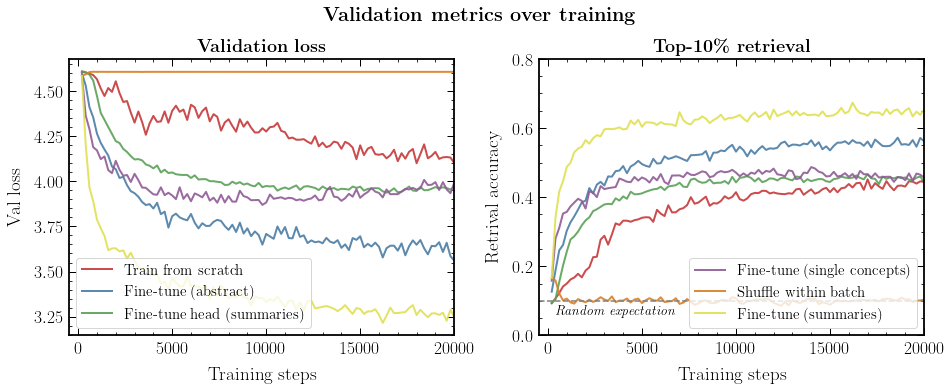

In [10]:
import numpy as np

run_labels = ['fresh-jazz-84',
             'solar-fog-85',
              'stellar-serenity-86',
              'different-donkey-87',
              'ancient-pine-88',
              'pleasant-totem-89',
              ]

run_legends = ['Fine-tune (summaries)', 
              "Shuffle within batch",
               'Fine-tune (single concepts)',
               "Fine-tune head (summaries)",
               'Fine-tune (abstract)',
               'Train from scratch',
               ]

# Creating the dictionary
run_dict = {run_labels[i]: run_legends[i] for i in range(len(run_labels))}

api = wandb.Api()
runs = api.runs("smsharma/multimodal-hubble")

# Initialize dictionaries to hold the data for plotting
top5_data = {}
top10_data = {}

for run in runs:
    if run.name in run_labels:
        
        # Fetch history for top 5 and top 10 accuracy
        history_top5 = run.history(keys=["val/loss"])
        history_top10 = run.history(keys=["val/top_10_accuracy"])  # assuming this key exists

        # Store the data for later plotting
        top5_data[run.name] = (history_top5['_step'], history_top5['val/loss'])
        top10_data[run.name] = (history_top10['_step'], history_top10['val/top_10_accuracy'])  # replace with correct key if different

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12 * 1.1, 5 * 1.1))

# Plot for Top 5 Accuracy
for idx, (run_name, (steps, accuracy)) in enumerate(top5_data.items()):
    ls = '-' if run_dict[run_name] == "Shuffle within batch" else '-'
    axes[0].plot(list(200 * np.arange(1, len(steps) + 1)), list(accuracy), label=run_dict[run_name], lw=2., ls=ls)  # replace with correct key if different

axes[0].set_title(r"\textbf{Validation loss}")
axes[0].set_xlabel("Training steps")
axes[0].set_ylabel("Val loss")
# axes[0].axhline(0.05, color='grey', ls='--', lw=1.5)
# axes[0].set_ylim(0, 0.3)
axes[0].set_xlim(-500, 20_000)

# Getting handles and labels from ax[0]
handles, labels = axes[0].get_legend_handles_labels()

# Selecting half of the legend items
half = len(handles) // 2
selected_handles = handles[half:]
selected_labels = labels[half:]

axes[0].legend(handles[:half], labels[:half], frameon=True, framealpha=0.8, fontsize=15)

# Plot for Top 10 Accuracy
for run_name, (steps, accuracy) in top10_data.items():
    ls = '-' if run_dict[run_name] == "Shuffle within batch" else '-'
    axes[1].plot(list(200 * np.arange(1, len(steps) + 1)), list(accuracy), label=run_dict[run_name], lw=2., ls=ls)  # replace with correct key if different

axes[1].set_title(r"\textbf{Top-10\% retrieval}")
axes[1].set_xlabel("Training steps")
axes[1].set_ylabel("Retrival accuracy")
axes[1].axhline(0.1, color='grey', ls='--', lw=1.5)
axes[1].set_ylim(0, 0.8)
axes[1].set_xlim(-500, 20_000)
axes[1].text(400, 0.06, r"\emph{Random expectation}", fontsize=14)
    
fig.suptitle(r"\textbf{Validation metrics over training}", fontsize=20)
# axes[1].legend(frameon=True, framealpha=0.8, fontsize=15)

axes[1].legend(selected_handles, selected_labels, frameon=True, framealpha=0.8, fontsize=15, loc='lower right')

plt.tight_layout()
plt.savefig("../paper/plots/val_metrics.pdf")